In [1]:
from MBQC_basic_functions import*
import time
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.quantum_info.operators import Operator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import Aer


In [2]:
def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states

def CNOT_error(p):
    p_flip = p*2/3
    #output a error model for the CNOT gate (in the nearest neighbor setting)
    Nq = 14
    vec = Hilbertspace_Zr(Nq,2)
    err_vec = np.zeros((16,Nq+1),dtype=int)
    for i in range(2**Nq):
        s_flip=vec[i,:]
        sz_c = np.sum(vec[i,[0,2,3,4,7,8,10]])
        sx_c = np.sum(vec[i,[1,2,4,5]])
        sz_t = np.sum(vec[i,[8,10,12]])
        sx_t = np.sum(vec[i,[1,2,7,9,11,13]])
        p_exp = np.sum(vec[i,:])
        
        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
        err_vec[i_e,p_exp] += 1
        
    p_vec = p_flip**np.arange(15)*(1-p_flip)**np.arange(14,-1,-1)
    err_prob = err_vec @ p_vec
    pauli_vec = Hilbertspace_Zr(4,2)
    pauli_combined = []
    for i in range(16):
        p_st = ''
        p1 = pauli_vec[i,:2]@ np.array([1,2])
        if  p1 == 0:
            p_st += 'I'
        elif  p1 == 1:
            p_st += 'Z'
        elif  p1 == 2:
            p_st += 'X'
        else:
            p_st += 'Y'
        p2 = pauli_vec[i,2:]@ np.array([1,2])
        if  p2 == 0:
            p_st += 'I'
        elif  p2 == 1:
            p_st += 'Z'
        elif  p2 == 2:
            p_st += 'X'
        else:
            p_st += 'Y'
    
        pauli_combined.append((p_st,err_prob[i]))
    return pauli_combined

In [9]:
error= CNOT_error(.01)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


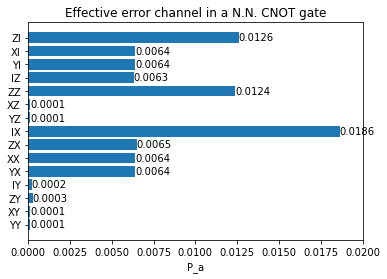

In [12]:
# Fixing random state for reproducibility
np.random.seed(19180801)

# Example data
channel = []
performance = []
for i in range (1,16):
    print(i)
    channel.append(error[i][0])
    performance.append(error[i][1])
y_pos = np.arange(len(error)-1)

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=channel)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('P_a')
ax.set_title('Effective error channel in a N.N. CNOT gate')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.4f')
ax.set_xlim(right=.02)  # adjust xlim to fit labels
plt.savefig('cnot.pdf')
plt.show()

In [61]:
error[1][0]

IndexError: invalid index to scalar variable.

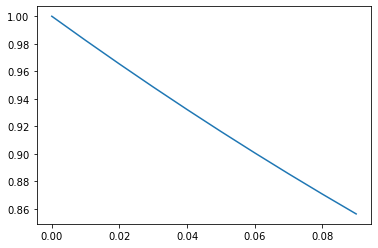

In [34]:
p = np.arange(10)*1e-2

F_avg = error_rules(p, 'H',theta = 0)
plt.plot(p,F_avg)